In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from IPython import display

torch.Size([28, 28])


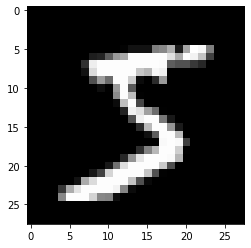

In [3]:
mnist_data = torchvision.datasets.MNIST('/', download=True)
image, n = mnist_data[0]
array = np.asarray(image)/255
tensor = torch.tensor(array).float()
print(tensor.shape)
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
def get_sample(n_samples):
    x, y = torch.randint(28, size=(2, n_samples))
    c = tensor[x, y]
    return x, y, c

def get_tensors(x, y, c, positional):
    inputs = positional_encoding(x, y, L=6) if positional else torch.stack([x, y]).T.float()/28
    targets = torch.stack([c]).T
    return inputs, targets

def get_points(x, y):
    points = torch.empty((28, 28))
    points[:, :] = torch.nan
    points[x, y] = 1.0
    return points.numpy()

def show(net, points, positional):
    x, y = torch.tensor([[x, y] for x in range(28) for y in range(28)]).T
    inputs = positional_encoding(x, y, L=6) if positional else torch.stack([x, y]).T.float()/28
    with torch.no_grad():
        render = net(inputs).reshape(28, 28).numpy()
    plt.imshow(render, cmap='gray')
    plt.imshow(points, cmap='bwr', vmin=0.0, vmax=1.0)
    plt.show()
    display.clear_output(wait=True)

def train(net, inputs, targets):
    net.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    return loss.item()

def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.grid(alpha=0.2)
    plt.show()
    display.clear_output(wait=True)

def positional_encoding(x, y, L=6):
    encoding_x, encoding_y = [], []
    for i in range(L):
        encoding_x += [torch.sin(2**i*x), torch.cos(2**i*x)]
        encoding_y += [torch.sin(2**i*y), torch.cos(2**i*y)]
    return torch.cat([torch.stack(encoding_x), torch.stack(encoding_y)]).T

In [59]:
class Net(nn.Module):
    def __init__(self, in_dim, hid_dim=256, out_dim=1):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_dim, hid_dim)
        self.fc2 = nn.Linear(hid_dim, hid_dim)
        self.fc3 = nn.Linear(hid_dim, hid_dim)
        self.fc4 = nn.Linear(hid_dim, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [85]:
n_epochs = 500
n_samples = 128
plot_epoch = 30

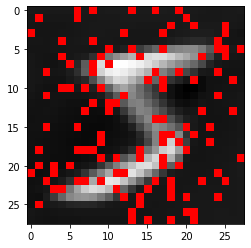

In [86]:
net = Net(in_dim=2)
optimizer = optim.Adam(net.parameters())
criterion = nn.MSELoss()
losses = []
positional = False
for epoch in range(n_epochs):
    x, y, c = get_sample(n_samples)
    points = get_points(x, y)
    inputs, targets = get_tensors(x, y, c, positional)
    loss = train(net, inputs, targets)
    losses.append(loss)
    if epoch%plot_epoch==0:
        show(net, points, positional)

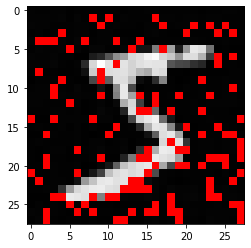

In [87]:
net = Net(in_dim=24)
optimizer = optim.Adam(net.parameters())
criterion = nn.MSELoss()
losses_pos = []
positional = True
for epoch in range(n_epochs):
    x, y, c = get_sample(n_samples)
    points = get_points(x, y)
    inputs, targets = get_tensors(x, y, c, positional)
    loss = train(net, inputs, targets)
    losses_pos.append(loss)
    if epoch%plot_epoch==0:
        show(net, points, positional)

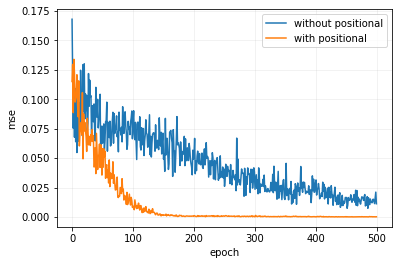

In [88]:
plt.plot(losses, label='without positional')
plt.plot(losses_pos, label='with positional')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.grid(alpha=0.2)
plt.legend()
plt.show()